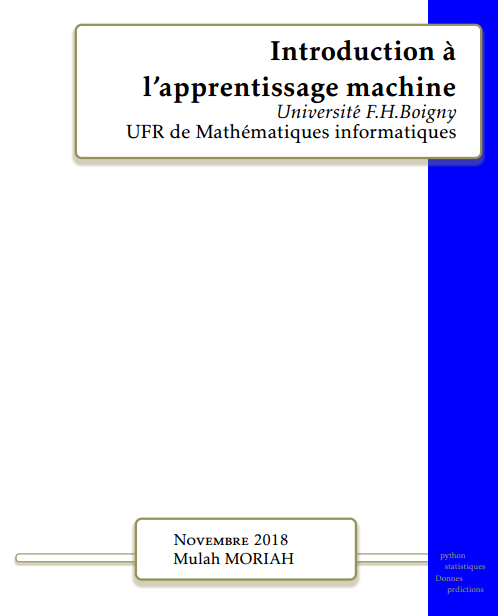

In [1]:
from IPython.display import Image
from IPython.core.display import HTML
Image(filename="ppg.png", width=750)

-----

*****

        
Ce document servira de brève introduction à l'apprentissage machine. Brève dans le sens où ce thème est un thème très large et qui, de plus, fait appel à des prérequis dans des domaines encore plus vaste; la programmation scientifique et statistique avec python et des connaissances pointus en mathématiques de façon générale et en statistique de façon particulière.

Ainsi, le lecteur sera emmené à explorer de lui même ces vastes domaines qu'il découvrira de façon succinte au cours de cette lecture. 




## Les points à aborder:
- Mise en place de notre environnement de travail
- Présentation des librairies les plus utilisées pour l'apprentissage machine
- L'apprentissage par l'exemple


## Partie I : Mise en place de notre environement de travail

Dans cette partie, nous allons mettre en place le nécessaire pour nous permettre de faire l'apprentissage machine avec python. Cette partie est indispensable pour nous éviter des problèmes plus tard. 
Concrètement nous nous assurerons que nous avons ou que nous pouvons nous procurer toutes les librairies nécessaires à l'apprentissage machine et que nous pouvons les installer.
Si vous savez parfaitement utiliser la librarie *pip*, vous pouvez vous rendre à la prochaine partie.        

Sinon, vous avez deux choix : 
- Télécharger un environment déja configuré qui contient toutes les librairies et des éditeurs textes. C'est le plus simple. Mais cela nécessite un ordinateur récent, un peu puissant et une connexion internet conséquente (environ 600Mo). Suivez ce lien [Anaconda: environement scientifique pour python](https://www.anaconda.com/download/)
- Vous apprenez à utiliser *pip* et là vous installerai les librairies au fur et à mesure que vous en aurai besoin. C'est la methode compliquée. Mais vous pourrez utiliser votre éditeur python de base sans vous encombrer avec une application energivore comme dans le premier cas.

Nous vous conseillons la première méthode. Une fois que c'est installé et que votre machine tient le coup, le tour est joué et on en parle plus.

## Partie II : Présentation des librairies les plus utilisées 

Les librairies que nous verrons sont: 
- **Pandas**, manipulation des données 
- **Matplotlib** et **seaborn**, graphiques et visualiations 
- **Numpy** , librairie mathematique
- **Sklearn**, collection d' algorithmes d' apprentissage machine

Comme dit plus haut, l' apprentissage machine fait appel à des connaissances vastes.      
Les trois premières librairies font parties de ce qu'on appelle **python scientifique**. Ce sont des librairies indispensables pour un scientifique et encore plus si vous vous attaquez aux données statistiques. Malheureusement ce thème est trop vaste et ne peut même pas être survolé en un nombre raisonnable de pages. 
       
La dernière librairie est la librairie la plus utilisée en apprentissage machine, elle renferme tous les algorithmes connus à ce jour sur le sujet. Mais la compréhension des méthodes utilisées nécessite des connaissances statistiques et mathématiques assez poussées.
Vous savez, l'ordinateur est de très bonne volonté, quelque soit l'incohérence scientifique de ce que vous faites, il vous donnera des résultats. Donc dans ce domaine, les connaissances en informatique doivent être supervisé par des connaissances en mathématiqes. N' hésitez donc pas à chercher et comprendre les principes qui se cachent derrière chaque algorithme que nous verrons.

## Partie III : Apprentissage par l'exemple

###  Présentation

L'apprentissage machine se définit comme un domaine de l'intelligence artificielle qui utilise des techniques statistiques pour donner à l'ordinateur la capacité "d'apprendre" des données, sans être explicitement programmé pour cela. En d'autres termes, l'apprentissage machine (en abrégé AM) utilise des algorithmes basés sur des techniques statistiques pour permettre à l'ordinateur de prévoir des situations juste en utilisant des données.        

Après une première lecture cela peut paraître abstrait. Je vais directement présenter l'exemple que nous allons traiter pour permettre une meilleure compréhension.           

Nous connaissons tous le *TITANIC* et l'histoire de son naufrage. Nous allons utilisé nos méthodes AM sur nos tableaux de données contenant des informations sur ses passagers. Et le but sera qu'à l'issu de notre travail, l'ordinateur puisse prévoir si un individu survit ou non à ce drame en se basant sur les informations qu'on a pu tirer des données.      
Pensez à la regression linéaire vu en statistique,    
$$ Y = \alpha X + \beta$$      
on utilise les données et à l'aide de ces données on construit un modèle pour approcher $Y$ (on trouve $\alpha$ et $\beta$ avec $Y$ connu). On utilise ensuite l'équation obtenue pour déterminer des valeurs inconnues de $Y$ .       

**C'est exactement le même principe pour l' AM. La regression linéaire étant une méthode d'AM.**      
En revenant à notre sujet d'étude, $Y$ (la variable que nous voulons prédire) est *survived*. Nous devons donc utilisé des données où les $X$ (les autres variables utilisées pour prédire $Y$) et $Y$ sont connus de telle sorte à "entrainer" le modèle, c'est-à-dire rendre l'ordinateur capable de prédire $Y$ (trouver $\alpha$ et $\beta$ de la regression linéaire). Et maintenant nous pourrons utilisé le modèle obtenu sur des données qui ne contiennent que les $X$ et donc prédire $Y$.                 
             
Rentrons maintenant dans le vif du sujet.            
Nous allons procéder par étapes. Ces étapes forment généralement les étapes à suivre dans une étude de ce type.

###  I. Importations des librairies classiques

In [1]:
import numpy as np #importer numpy sous le nom de np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### II. Entrer des données dans la machine         
Il nous faut toujours deux tableaux de données.
- Un tableau de données pour "entrainer" le modèle d' AM, que nous appellerons *dftrain*. C'est un tableau de données qui contient toutes les variables 

In [2]:
dftrain = pd.read_csv("train.csv")
dftrain.head(5)
#dftrain.head(n) avoir les n premières 
#lignes du tableau

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Un tableau de données qui servira à tester la qualité de notre modèle en essayant de prédire des $Y$ inconnus. Ce tableau contient toutes les variables sauf la variable à prédire *survived*.

In [3]:
dftest = pd.read_csv("test.csv")
dftest.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### III. Exploration et analyse des données
Cette étape sert à approfondir nos connaissances sur les données. 

In [4]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


891 passager dans ces données, 11 variables + 1 variable cible (variable à prédire; "Survived")

- survived: passager survit ou non ( 1 ou 0)
- PassengerId: Identifiant du passager
- pclass: Classe du ticket de l'individu (1 pour 1erclasse, 2:2emeclasse, 3:3emeclasse
- sex: Sexe
- name: nom 
- Age: Age en année
- sibsp: nombre de frère+soeurs+compagne à bord du titanic 
- parch: nombre de parents+enfants à bord du titanic
- ticket: numero du ticket
- fare: prix du ticket du passager
- cabin: numero de cabine
- embarked: Port d'embarcation

Dans notre exploration, nous devons avoir en tête que nous cherchons les variables qui permettent de prédire au mieux si un individu décède ou non. En termes statistiques, quelles sont les variables qui influencent de façon significative la variable *survived*?.

De façon intuitive, nous pouvons dire que les variables *PassergerId*, *Name*, *ticket* et *embarked* ne sont pas pertinentes pour déterminer si un passager survit ou non. Et de même nous pouvons dire que les variables *sex, age* auront un gros impact. Ne dit-on pas les femmes et les enfants d'abord?
          
Nous profitons de ces deux remarques pour dire que pour analyser des données, il faut bien connaître les variables et le contexte. Ainsi nous pourrons utiliser notre intuition pour savoir ce qui vaut la peine d'être approfondit et ce qui n'en vaut pas la peine. L'analyse elle, ne viendra que vérifier nos intuitions.       
Inspectons les variables de plus près.

#### 1. Age

In [6]:
dftrain.describe().Age
#Quelques statistiques descriptives

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

714 observations pourtant on a 891 passagers. Ce qui veut dire qu'il y a des valeurs manquantes. C'est à dire des cases qui ne sont pas renseignées, ces valeurs représentent un grand problème à gérer pour nous. Nous les verrons avec plus de détails dans les parties à venir.
Nous voyons aussi que 75% des passagers ont moins de 38ans.

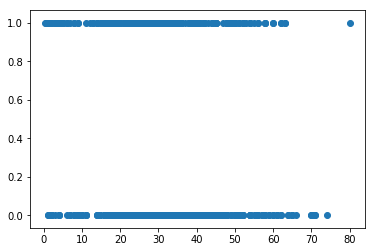

In [7]:
plt.scatter(dftrain["Age"],dftrain["Survived"]) #nuage de points

Dans ce cas le nuage de points est vraiment une mauvaise idée car nous avons une variable continue. Nous constatons qu'il est difficile de tirer des informations significatives quand la variable âge est sous cette forme.
Essayons quelque chose de plus poussez.        
Ce bout de code est un poil plus compliqué mais on peut facilement faire pire. Cela fait partie des compétences que vous devez acquérir en terme de python scientifique. Il y a du pain sur la planche!

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


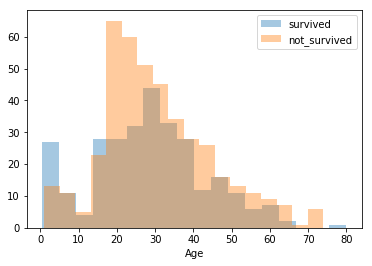

In [8]:
#superposition de deux histogrammes à l'aide de sns.distplot
ax = sns.distplot(dftrain[dftrain['Survived']==1].Age.dropna(),
bins=18, label = 'survived', kde =False)
#dftrain[dftrain['survived']==1] signifie que dans le tableau dftrain, on ne retient que les individu tels
#que dftrain['Survived'] égale à 1
# cad tels que la valeur de Survived est 1.
#".Age.dropna()" signifie que dans le tableau que nous avons retenu plus haut, nous 
#prenons maintenant sa colonne Age.".dropna()" signifie qu'on ne considère que les individus dont la
#case Age est renseignée.
ax = sns.distplot(dftrain[dftrain['Survived']==0].Age.dropna(),
bins=18, label = 'not_survived', kde =False)

ax.legend()

Le graphique parle de lui même.     
Ceci peut nous donner quelques idées sur comment repartir nos classes.      
Ce qui est intéressant à ce niveau est de voir que le taux de survie fluctue avec l'âge ce qui veut dire que l'âge influence certainement ce taux.

#### 2. Sex 

In [9]:
sex = dftrain["Sex"] # extraire la colonne sex
sex.describe() 

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

891 observations, donc aucune donnée manquante.       
577 mâles et 314 femelles.

Influence sur la variable survived.

In [10]:
dftrain.pivot_table(values='Survived',index=['Sex']) #table pivot de la probalité de survivre suivant le sexe

,Survived
Sex,
female,0.742038
male,0.188908


On voit très clairement que le sexe est un facteur très discriminant. Cette variable, comme nous pouvions le présentir, est determinante.    


**Age et sexe**

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


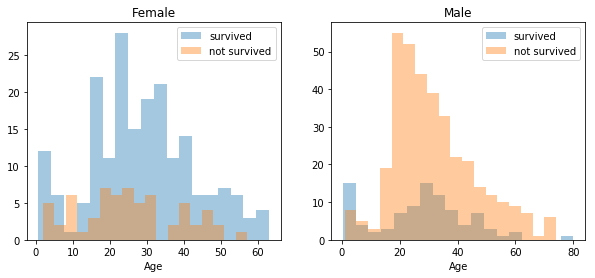

In [11]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = dftrain[dftrain['Sex']=='female']
men = dftrain[dftrain['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(),
bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(),
bins=18, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(),
bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(),
bins=18, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

Ces graphiques représentent le taux de survie par sexe suivant l'âge. Nous pouvons voir pour chaque sexe comment se comporte le taux de survie.      
Nous pouvons dire par exemple que le taux de survie des hommes entre 5 et 18 ans est plus faible que celui des femmes.

#### 3. Pclass

In [12]:
dftrain.describe().Pclass

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

891 observations donc pas de valeurs manquantes. A travers la moyenne nous pouvons voir qu' il y a plus d'individu dans la classe 3. Les autres statistiques ne sont pas intéressantes.

In [13]:
 dftrain['Pclass'].value_counts() #nombre d'individu par classe.

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
dftrain.pivot_table(values='Survived',index=['Pclass']) # A quelle point une difference d'échelle peut influencer 

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Nous voyons que la probabilité de survie est liée à la classe dans laquelle se trouve le passager. Plus la classe est meilleure, plus il a de chance de survivre.       
Nous allons pointer un fait du doigt. Comme dit au début, nous devons utiliser des connaissances mathématiques pour confirmer ces résultats. Mais étant donné
que ce n'est qu'une introduction, nous nous permettons de fermer les yeux et de faire des conclusions hâtives. 
Par exemple, cette remarque faite plus haut semble être évidente mais statistiquement elle peut être fausse. En effet, le fait que pour chaque classe on est un nombre différent de passagers 
fait qu'on ne peut pas conclure directement que ces probabilités sont différentes. Il faut pour cela effectuer des tests d'égalité des proportions dans deux groupes (statistique inférentielle).

#### 4.SibSp and Parch 

Pour nous, ces deux variables prennent plus de sens en étant fusionner. Créons donc une variables *proche* qui est la somme de *SibSp* et de *Parch*.

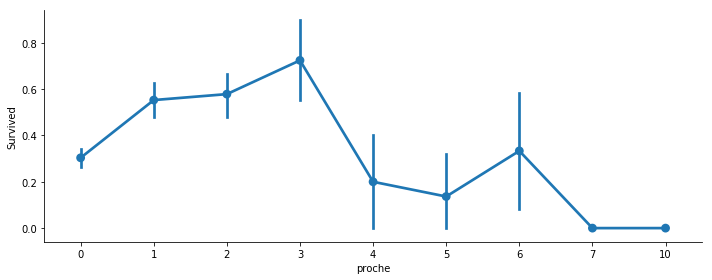

In [5]:
dftrain["proche"] = dftrain["SibSp"] + dftrain["Parch"]
axes = sns.factorplot("proche", "Survived", data=dftrain, aspect=2.5)

Nous voyons que nous avons une probabilité de survie élévée quand un passager à entre 1 et 3 proches. Mais cette probabilité est plus faible quand le passager à moins de 1 ou plus de 3 proches. (sauf le cas particulier de 6 proches).

#### 5. Cabin 

In [16]:
dftrain["Cabin"].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

687 données manquantes! Cette variable est inutilisable nous allons l'ajouter à la liste des variables que 
nous négligeons.

### 6. Fare

In [23]:
dftrain["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Nous voyons qu'il n'y a pas de valeurs manquantes. Mais nous constatons qu'il existe des *Fare* nul (car le min est 0).       
Regardons la distribution de cette variable de plus prêt.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021239304630>]],
      dtype=object)

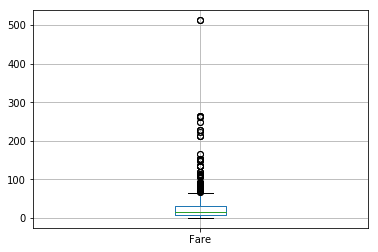

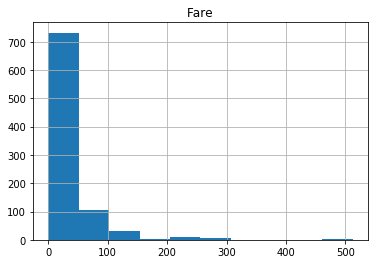

In [29]:
dftrain.boxplot(column="Fare") # boîte à moustache
dftrain.hist(column="Fare") # histogramme

In [33]:
# Calculer les deciles
decile = np.percentile(dftrain["Fare"], np.arange(0, 100, 10))
for i in range (0,10):
    print(i*10,'% = ',centile[i])


0 % =  0.0
10 % =  7.55
20 % =  7.8542
30 % =  8.05
40 % =  10.5
50 % =  14.4542
60 % =  21.6792
70 % =  27.0
80 % =  39.6875
90 % =  77.9583


Nous observons à travers ces graphiques et le calcul des déciles que nous avons une variable dont les valeurs sont concentrées entre 0 et 40 (80% de la population à un Fare inférieur à 39,69) et qu'elle admet des valeurs s'écartant grandement de ce qui est observé en moyenne (i.e. 512). Ces valeurs sont appelées **des valeurs atypiques**. Les valeurs atypiques ou abérrantes sont des valeurs qui s'écartent fortement de ce qu'on peut espérer comme valeur ( le prix d'un parapluie X est de 200.000fcfa).           
**Comment "gérer" ces valeurs atypiques?**   

*Pour expliquer nous allons prendre l'exemple d'une classe et consideré la variable note en Mathématiques.*

Il faut d'abord se demander est ce  que ces valeurs sont expliquables ou envisageables dans la pratique?       
- Si oui, (un étudiant à 20/20) alors c'est à vous de voir si vous gardez ces valeurs. Pourquoi?     
Si vous êtes interressé par la moyenne d'une variable, les valeurs atypiques peuvent biaiser l'étude. Dans notre classe la majorité des notes se situent entre 7 et 9 mais comme certains étudiants ont eu 20 nous pouvons obtenir une moyenne de 12 par exemple. Ce qui ne reflète pas vraiment le niveau de la classe en générale.      
En raisonnant dans l'autre sens, ignorer les valeurs atypiques conduit à une perte d'information. C'est à vous de peser le pour et le contre et de décider en fonction des résultats souhaités et du contexte.     
- Si non, (un étudiant à 22/20) alors il faut se débarraser de ces valeurs. Elles vont influencées les calculs alors qu'elles sont le fruit d'erreur.        
      
Revenons à notre étude. Nous pouvons dire que les grandes valeurs que nous avons sont des valeurs envisageables ( les suites de luxe de la 1ère classe). Est ce que nous les gardons?       
Oui, car nous estimons que l'information contenue dans ces valeurs est trop grande pour être négligée. Et que ces valeurs ne rendent pas la moyenne (32) de notre variable incompatible avec les observations.     
De même pour les valeurs nulles, nous pouvons dire qu'elles sont envisageables ( des passagers ayant gagnés leur place). Nous les gardons aussi.

In [36]:
#moyenne des Fare par rapport au Pclass
dftrain.pivot_table(values='Fare',index=['Pclass'])

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


Les résultats sont logiques. Les prix augmentent au fur et à mesure qu'on monte dans la hiérarchie des classes.       
Si nous avions obtenu des résultats différents, nous aurions dû étudier la variable de plus près pour comprendre. Ou repartir à l'étape des valeurs atypiques pour voir si rien ne nous à échapper.

In [37]:
#moyenne des Fare sachant que l'individu a survécu ou non (1 et 0) 
dftrain.pivot_table(values='Fare',index=['Survived'])

,Fare
Survived,
0,22.117887
1,48.395408


Ici aussi nous aurions pu prédire ce résultat. En moyenne ceux qui ont survécu ont payé plus chère.       
Intuitivement, nous pouvons dire que cette variable est très reliée à la variable Pclass. Parce que naturellement les prix sont fixés suivant les classes.        
Le fait que ces variables soit corrélés peut poser problème dans certaines méthodes d' AM (par exemple regression linéaire). C'est pour cette raison qu'au-delà de savoir implémenter les méthodes, il faut comprendre les principes mathématiques sous-jacent pour:    
- Eviter de perdre le temps à utiliser une méthode qui n'est pas adéquate
- Perdre du temps en utilisant une méthode donc on a mal choisi les variables ou dont les variables sont bonnes mais mal pretraiter.
- Pouvoir expliquer les résultats 

### IV. Prétraitement des données
Nous allons, dans cette étape, préparer nos données à être soumis à nos algorithme d' AM.      
Pour cela nous devons nous debarraser de tout ce qui peut être nuisible, c'est-à-dire les valeurs manquantes NaN(not a number), les variables inutiles ...     
Et mettre les données restantes sous une forme appropriée, c'est-à-dire sous la forme de variables quantitatives discrètes ou de variables booléennes.          
De plus, on peut ajouter des variables **pertinentes** calculées à partir des variables retenues.        


#### 1. Données manquantes

Les données manquantes, un vrai casse tête, un point très sensible.      
Les résultats d'un AM dépendent en grande partie des données que nous utilisons et de comment nous les modifions.        
Ainsi notre gestion de ces données influencera indéniablement nos résultats.       

**Qu'est ce que les données manquantes?**    
Ce sont des cases vides, des cases du tableau qui ne sont pas renseignées. Il existe trois types de données manquantes que je vais définir de façon simple: 
- Les données manquantes dûes à une erreur dans la gestion des fichiers. Le statisticien peut involontairement oublier de remplir une case.
- Les données manquantes dûes à la volonté de l'individu de ne pas révéler une information sans que cela ne soit liée à la raison de l'étude ou à son issu. Les femmes n'aiment pas donner leur âge la plupart du temps.
- Les données manquantes dûes à la volonté de l'individu de ne pas révéler une information sachant que cette information influence les résultats de l'étude.        

De plus en AM, nous rangeons les valeurs illogiques (un individu qui a 250ans) dans la classe des valeurs manquantes (valeurs manquantes dû à une erreur).          

Une fois les valeurs manquantes trouvées, faut-il:
- Supprimer les lignes ou les colonnes qui les contiennent. Sous peine de perdre de grande quantité d'information
- Ou les remplir (avec par exemple le moyenne de la variable ou l'observation la plus probable ou des observations tirées aléatoirement...) Sous peine de biaiser l'étude.         

Il existe toute une théorie sur ça. Nous vous invitons à vous documentez sur le sujet. 
En tant que débutant, si une colonne contient trop de valeurs manquantes (Cabin) nous l'ignorons sinon nous remplirons les cases vides avec la moyenne de la variable.       

Occupons nous des valeurs manquantes de la variable âge.


#### Age

Nous allons implémenté plusieurs manières simple de remplir ces valeurs manquantes.

- Remplir avec la moyenne

In [17]:
moyenneage = np.mean(dftrain["Age"])
dftrain ["Age"] = dftrain["Age"].fillna(moyenneage)
dftrain["Age"].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

- Ou par une valeur choisie aléatoirement parmi les valeurs observées pour la variable Age.

In [6]:
import random
Age = dftrain["Age"]
p = Age.copy()
for i in range(len(Age)):
    if (Age.isnull()[i] == True):
        p[i] = random.sample(list(Age.dropna()),1)[0]
dftrain["Age"] = p

- Remplir en tenant compte des individus pour lesquels les données sont manquantes          
Pour faire simple nous allons utilisée la moyenne des femmes quand le passager dont l'âge n'est pas spécifié est une femme et pareil pour les hommes. 
Nous aurions pu par exemple utiliser la variable *Name* qui contient des civilités (Miss, Madam, Sir) pour avoir plus d'information sur l'âge que l'individu pourrai avoir. C'est à vous de tirer le plus d'information possible des données.

In [19]:
dffemme = dftrain[dftrain["Sex"]=="female"]
dfhomme = dftrain[dftrain["Sex"]=="male"] 
inter = Age.copy()
for i in range(len(dftrain)):
    if (Age.isnull()[i] == True):
        if (dftrain.iloc[i].Sex == "female"):
            inter[i] = np.mean(dffemme["Age"])
        else:
            inter[i] = np.mean(dfhomme["Age"])
dftrain["Age"] = inter
#-dftrain["X"] représente la colonne nommé X, et donc la variable X.
#Ainsi dftrain[dftrain["Sex"]=="male"] signifie dans dftrain récupérer les individus tels que l' observation de la 
#varaible Sex est male.   
#-dftrain.iloc[i] permet d'obtenir les informations sur l'individu qui est à la ième position de notre tableau
#Nous savons que chaque individu à plusieurs attributs (les variables observées: Age, Name ...). Donc le '.Sex' permet 
#d'obtenir la valeur de cet attribut pour l'individu i.
#N'oubliez pas que les positions dans un tableau commence par 0. Donc cet individu est le i+1ème individu en réalité.


### V. Convertion des variables

#### 1) Sex 

In [7]:
genre = {"male": 0, "female": 1}
dftrain['Sex'] = dftrain['Sex'].map(genre)

#### 2) Fare
Elle est de type float. Transformons la en int.

In [8]:
dftrain["Fare"] = dftrain["Fare"].astype(int)

### VI. Creation de classe
Cette étape est délicate. Il existe des principes et méthodes statistiques pour vous aider à resoudre ce problème.      
*La fonction qcut de sklearn* permet de générer les classes automatiquement.    

Vous pouvez aussi vous même constituer vos classes suivant vos besoins.     
Mais il faut garder à l'esprit que les classes doivent être équilibrées.    

#### 1) Age 
Nous avons une variable quantitatives continue il faut donc regrouper les observations en classe.    

In [9]:
dftrain['Age'] = dftrain['Age'].astype(int)
dftrain.loc[ dftrain['Age'] <= 11, 'Age'] = 0
dftrain.loc[(dftrain['Age'] > 11) & (dftrain['Age'] <=
18), 'Age'] = 1
dftrain.loc[(dftrain['Age'] > 18) & (dftrain['Age'] <=
22), 'Age'] = 2
dftrain.loc[(dftrain['Age'] > 22) & (dftrain['Age'] <=
27), 'Age'] = 3
dftrain.loc[(dftrain['Age'] > 27) & (dftrain['Age'] <=
33), 'Age'] = 4
dftrain.loc[(dftrain['Age'] > 33) & (dftrain['Age'] <=
40), 'Age'] = 5
dftrain.loc[(dftrain['Age'] > 40) & (dftrain['Age'] <=
66), 'Age'] = 6
dftrain.loc[ dftrain['Age'] > 66, 'Age'] = 6

# Voyons comment c'est reparti
dftrain['Age'].value_counts()


6    180
4    158
5    132
3    131
2    113
0     89
1     88
Name: Age, dtype: int64

#### 2) Fare 
Faisons pareil ici.

In [10]:

dftrain.loc[ dftrain['Fare'] <= 7.91, 'Fare'] = 0
dftrain.loc[(dftrain['Fare'] > 7.91) & (dftrain['Fare']
<= 14.454), 'Fare'] = 1
dftrain.loc[(dftrain['Fare'] > 14.454) &
(dftrain['Fare'] <= 31), 'Fare'] = 2
dftrain.loc[(dftrain['Fare'] > 31) & (dftrain['Fare'] <=
99), 'Fare'] = 3
dftrain.loc[(dftrain['Fare'] > 99) & (dftrain['Fare'] <=
250), 'Fare'] = 4
dftrain.loc[ dftrain['Fare'] > 250, 'Fare'] = 5
dftrain['Fare'] = dftrain['Fare'].astype(int)


**Dernier ajustement**

In [53]:
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,proche
0,1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,0,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,PC 17599,3,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,1,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,113803,3,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,5,0,0,373450,1,NaN,S,0


In [11]:

#supprimons les variables que nous nous avons decider de
#ne pas utiliser
dftrain = dftrain.drop(columns=["Ticket","Cabin","Embarked","SibSp","Parch", "Name","PassengerId"])


In [12]:
dftrain.head()

,Survived,Pclass,Sex,Age,Fare,proche
0,0,3,0,2,0,1
1,1,1,1,5,3,1
2,1,3,1,3,0,0
3,1,1,1,5,3,1
4,0,3,0,5,1,0


Voici donc à quoi ressemble notre tableau au final.     
Nous répétons encore une fois que nous avons fait passé la simplicité avant tout. Il y a vraiment beaucoup de marge pour être plus rigoureux, technique et ingénieux.       
    
Avant de passer à la prochaine étape nous devons aussi mettre le tableau de test (dftest) sous cette forme. C'est-à-dire y appliqué toutes les modifications que nous avons faites sur dftrain. Le mieux est de modifier les deux tableaux en même temps.    


In [ ]:
#En procedant de la sorte
#data = [dftran, dftest]
#for dataset in data:
#    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
#    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare']
#    <= 14.454), 'Fare'] = 1
#        .       .       .   
#        .        .       .
#          .      .       .

Nous ne l'avons pas fait pour ne pas encombrer la lecture et aussi pour que vous puissiez voir toutes les modification effectuées en un même endroit.

In [57]:
#Avant
dftest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
#modification
dftest["proche"] = dftest["SibSp"] + dftest["Parch"]
dftest = dftest.drop(columns=["Ticket","Cabin","Embarked","SibSp","Parch", "Name","PassengerId"])

#
genre = {"male": 0, "female": 1}
dftest['Sex'] = dftest['Sex'].map(genre)

#Valeurs manquantes age
import random
Age = dftest["Age"]
p = Age.copy()
for i in range(len(Age)):
    if (Age.isnull()[i] == True):
        p[i] = random.sample(list(Age.dropna()),1)[0]
dftest["Age"] = p

#Classe Age
dftest['Age'] = dftest['Age'].astype(int)
dftest.loc[ dftest['Age'] <= 11, 'Age'] = 0
dftest.loc[(dftest['Age'] > 11) & (dftest['Age'] <=18), 'Age'] = 1
dftest.loc[(dftest['Age'] > 18) & (dftest['Age'] <=22), 'Age'] = 2
dftest.loc[(dftest['Age'] > 22) & (dftest['Age'] <=27), 'Age'] = 3
dftest.loc[(dftest['Age'] > 27) & (dftest['Age'] <=33), 'Age'] = 4
dftest.loc[(dftest['Age'] > 33) & (dftest['Age'] <=40), 'Age'] = 5
dftest.loc[(dftest['Age'] > 40) & (dftest['Age'] <=66), 'Age'] = 6
dftest.loc[ dftest['Age'] > 66, 'Age'] = 6

#Classe Fare
dftest['Fare'] = dftest['Fare'].fillna(0)
dftest.loc[ dftest['Fare'] <= 7.91, 'Fare'] = 0
dftest.loc[(dftest['Fare'] > 7.91) & (dftest['Fare']<= 14.454), 'Fare'] = 1
dftest.loc[(dftest['Fare'] > 14.454) &(dftest['Fare'] <= 31), 'Fare'] = 2
dftest.loc[(dftest['Fare'] > 31) & (dftest['Fare'] <=99), 'Fare'] = 3
dftest.loc[(dftest['Fare'] > 99) & (dftest['Fare'] <=250), 'Fare'] = 4
dftest.loc[ dftest['Fare'] > 250, 'Fare'] = 5
dftest['Fare'] = dftest['Fare'].astype(int)


In [14]:
#Après
dftest.head()

,Pclass,Sex,Age,Fare,proche
0,3,0,5,0,0
1,3,1,6,0,1
2,2,0,6,1,0
3,3,0,3,1,0
4,3,1,2,1,2


Nous tenons à dire qu'avant de passer à l'étape de la construction des modèles, nous pouvons effectuer une analyse  des correspondances multiples (méthode d'analyse factorielle) pour mieux comprendre les relations qui lient les variables. Et c'est pour nous une étape importante car les résultats de cette méthode sont solidement ancrée dans des principes mathématiques. Et mène donc à des interprètations universelles.           
Pour notre introduction, nous nous en passerons car cela est corsé autant mathématiquement qu'informatiquement.       
Si vous voulez progresser voici un thème à approfondir.

# VII. Construction des modèles d' AM
Maintenant nous pouvons entrainer plusieurs modèles et comparer leur resultat pour trouver le plus performant.

*Importons les algorithmes que nous utiliserons de la librairie sklearn*

In [33]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

Ensuite on doit séparer le tableau dftrain en deux. D'une part la variable Survived (Y_train) et d'autre part le reste du tableau (X_train).       
Le principe, c'est d'utilisé X_train pour prédire les valeurs de Y_train.

In [16]:
X_train = dftrain.drop("Survived", axis=1)
Y_train = dftrain["Survived"]
X_test = dftest.copy()

Nous allons utilisé ici quelques méthodes.       
Ces méthodes ont tous le même objectif mais utilisent des procédés différents et repose sur des hypothèses différentes.     
Il est important à ce niveau, comme il a été signifié plus haut, de bien connaître les méthodes et comprendre leur fonctionnement dans le but de gagner en précision et en temps.       
Nous ne présenterons mais les méthodes car cela demanderai trop de temps mais nous vous invitons à faire l'effort de prendre plus ample connaissance de ces méthodes.


### 1) Regression logistique

In [27]:
# regression logistique :: logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

### 2) Forêt aléatoire

In [28]:
#foret aleatoire :: random forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train,Y_train) * 100, 2)

### 3) K plus proches voisins

In [29]:
#K plus proches voisins :: K nearest neighbor
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

### 4) Arbre de decision

In [30]:
# arbre de decision :: decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

### 5) Classification naïve bayésienne

In [34]:
# Gaussian naive bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

### 6) Machine linéaire à vecteurs de support ou séparateurs linéaire à vaste marge 

In [36]:
#séparateurs à vaste marge (SVM) :: support vector machine
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) *100, 2)

## VIII. Quel est le meilleur modèle?

In [38]:
results = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'LogisticRegression',
'Random Forest', 'Naive Bayes', 'Decision Tree'],
'Score': [acc_linear_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
88.78,Random Forest
88.78,Decision Tree
85.63,KNN
79.80,LogisticRegression
79.24,Support Vector Machines
77.78,Naive Bayes


Les scores obtenus représentent le pourcentage d'évènements (décès ou survie) que le modèle a pu correctement prédire. 
Nous avons, dans cette étape, utilisé notre tableau de données modifié (dftrain) pour essayer de prédire si un passager survie ou non. Et ensuite nous comparons nos predictions au vrai résultat pour mesurer la performance de notre modèle.        
D'après les résultats obtenus, Random Forest et Decision Tree sont les meilleurs algorithmes dans ce cas particulier. C'est ces algorithmes que nous devons utilisé si nous voulons estimer des valeurs inconnus de *survived* en utilisant les variables que nous avons retenues.


## K-fold cross validation ( Validation croisée sur K-plis )

Pour mesurer la performance de nos modèles nous avons simplement comparé nos prédictions aux resultats. Les scores ainsi obtenus peuvent être jugés comme étant dûs au hazard d'échantillonage. Il existe cependant une méthode plus robuste qui est la méthode de validation croisée sur K-plis.       

Cette méthode consiste à subdiviser notre tableau de données en K groupes (appelés plis) choisit aléatoirement. Ensuite un pli sera choisit  comme le pli de test et les autres K-1 plis serviront à entraîner le modèle. Cette opération est répétée en boucle jusqu'à ce que chacun des K plis ait joué le rôle du pli de test.
Au final nous calculons la moyenne des scores et leur écart type.       
Selon ce que nous avons fait précédemment, la méthode *Forêt aléatoire* est la meilleure. Voyons quel est son score avec une validation croisée.

In [40]:
from sklearn.model_selection import cross_val_score
K=10
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=K,
scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.72222222 0.8        0.76404494 0.8988764  0.8988764  0.86516854
 0.78651685 0.7752809  0.82022472 0.84090909]
Mean: 0.8172120077176258
Standard Deviation: 0.05572707071390236


La précision moyenne est passée de 88% à 81% avec un écart-type de 4%. L'écart-type nous montre à quel point nos estimations sont précises.       
Cela signifie dans notre cas que la précision de notre modèle peut varier de + ou - 4%.      


La précision obtenue n'est pas si mal. Surtout quand nous savons que nous aurions pu faire mieux dans notre prétraitement des données.      
Et de plus nous avons utilisé cette méthode sans chercher à ameliorer ces performances ou à customiser les paramètres pour mieux correspondre à notre situation.         
En effet, pour un niveau avancé, ce que nous avons fait (en testant les modèles sur notre tableau de données) ne sert qu'à nous aider à choisir sur quel modèle nous devons concentrer notre énergie dans  le cas où nous ne sommes pas sûr de quel modèle utilisé. 

Au niveau où nous sommes, nous n'avons pas besoin d'aller plus loin.       
      
Nous avons déjà parcouru un long chemin.        

Nous avons commencé par explorer et analyser nos données. A l'aide de statistiques descriptives et de quelques visualisations nous avons pu trouver les valeurs manquantes et voir quelles variables étaient importantes.        
Ensuite nous avons préparer nos données pour les algorithmes AM. En nous occupant des données manquantes et en transformant les variables retenues.     
Puis nous avons utilisé nos algorithmes, calculé les scores et trouvé le meilleur.       
Et finalement nous avons découvert une méthode plus fiable pour calculer les scores.        
Et nous voici arrivé à la fin de notre introduction. Pour une introduction, nous n'avons pas trouvé meilleur exemple, pas simple mais pas incompréhensible non plus.   
Nous espérons que vous avez pris du plaisir à lire et que cela vous sera d'une grande utilité.        

Nous vous souhaitons la bienvenue dans le monde de **l'apprentissage machine.**   



*****

****

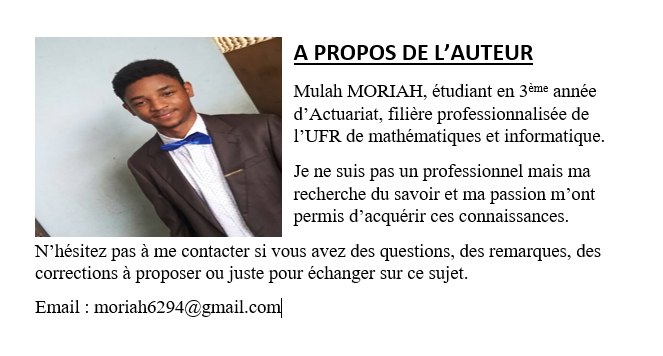

In [9]:
Image(filename="cap.png", width=750)
